In [1]:
import sys,os,math,string,time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from pyzillow.pyzillow import ZillowWrapper, GetDeepSearchResults
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import ensemble, tree, linear_model
import seaborn as sns
import scipy.stats as st
import missingno as msno
import pickle
pd.options.display.max_rows = 200

%matplotlib inline 

In [2]:
df = pd.read_csv("downsized_6.csv")
df = df.drop(columns=["Unnamed: 0"],axis=1)

In [3]:
df.columns

Index(['key', 'PID', 'ST_NUM', 'ST_NAME', 'ST_NAME_SUF', 'ZIPCODE', 'PTYPE',
       'LU', 'OWN_OCC', 'AV_BLDG', 'AV_TOTAL', 'GROSS_TAX', 'LAND_SF',
       'YR_BUILT', 'YR_REMOD', 'GROSS_AREA', 'LIVING_AREA', 'NUM_FLOORS',
       'R_BLDG_STYL', 'R_ROOF_TYP', 'R_EXT_FIN', 'R_TOTAL_RMS', 'R_BDRMS',
       'R_FULL_BTH', 'R_HALF_BTH', 'R_BTH_STYLE', 'R_KITCH', 'R_KITCH_STYLE',
       'R_HEAT_TYP', 'R_AC', 'R_FPLACE', 'R_EXT_CND', 'R_OVRALL_CND',
       'R_INT_CND', 'R_INT_FIN', 'R_VIEW', 'FULLADD', 'R_TOTAL_BTH',
       'MARKET_VALUE', 'DIFF_MV', 'DIFF_TAX', 'Lattitude', 'Longitude',
       'LatLon', 'DIS0', 'DIS1', 'DIS2', 'DIS3', 'DIS4', 'DIS5'],
      dtype='object')

In [4]:
df = df.drop(columns=["DIFF_TAX","DIFF_MV","Lattitude","Longitude","LatLon"],axis=1)

In [5]:
df = df[df["DIS0"]<100]
df["DIS0"] = np.log(df["DIS0"])
df["DIS1"] = np.log(df["DIS1"])
df["DIS2"] = np.log(df["DIS2"])
df["DIS3"] = np.log(df["DIS3"])
df["DIS4"] = np.log(df["DIS4"])

df["MARKET_VALUE"] = np.log(df["MARKET_VALUE"])
df["GROSS_AREA"] = np.log(df["GROSS_AREA"])
df["LIVING_AREA"] = np.log(df["LIVING_AREA"])
df["YR_REMOD"] = df["YR_REMOD"].fillna(value=0.0); 
df['OWN_OCC'] = df['OWN_OCC'].map({'Y': 1, 'N': 0})
df["key"] = pd.to_numeric(df["key"], errors='ignore')
df = df.dropna(); 
print(len(df))

28408


In [6]:
for feat in df.columns: 
    temper = df[df[feat].isna()]
    if(len(temper)>0): 
        print(feat, len(temper))

In [7]:
def BarPlot(xfeat,yfeat,xlabel,ylabel,df,fname):
    plt.figure(figsize=(14,8))
    ax = sns.boxplot(x=xfeat, y=yfeat, data=df[df["key"]==2019])
    plt.xticks(rotation=90)

    plt.xticks(size=24)
    plt.yticks(size=24)
    plt.xlabel(xlabel,size=32,labelpad=20)
    plt.ylabel(ylabel,size=32,labelpad=20)

    #plt.xlim(left=-0.5e6,right=0.5e6)
    plt.xticks(rotation=90)
    plt.savefig(fname,bbox_inches="tight",dpi=300)
    #plt.show()

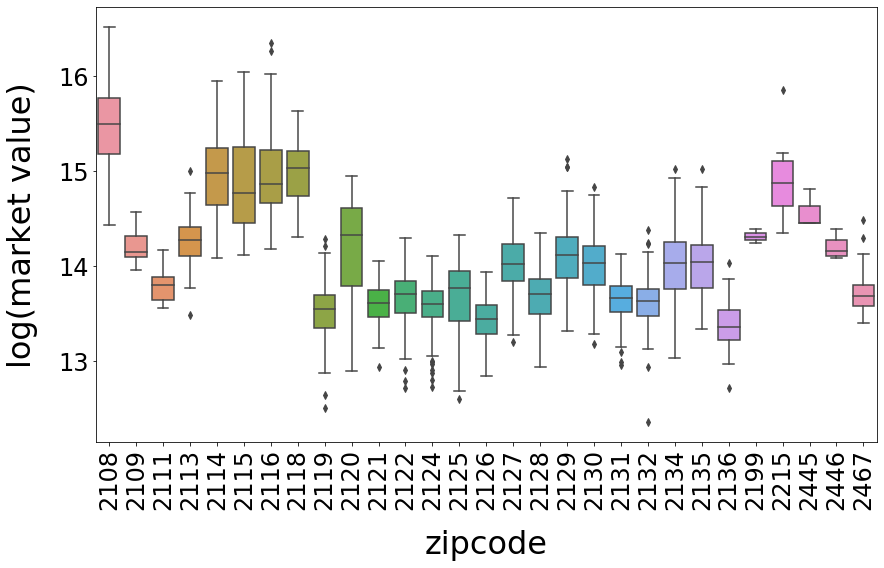

In [8]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="ZIPCODE", y="MARKET_VALUE", data=df[df["key"]==2019])
plt.xticks(rotation=90)

plt.xticks(size=24)
plt.yticks(size=24)
plt.xlabel("zipcode",size=32,labelpad=20)
plt.ylabel("log(market value)",size=32,labelpad=20)

#plt.xlim(left=-0.5e6,right=0.5e6)
plt.xticks(rotation=90)
plt.savefig("Zipcode_EDA.png",bbox_inches="tight",dpi=300)
plt.show()

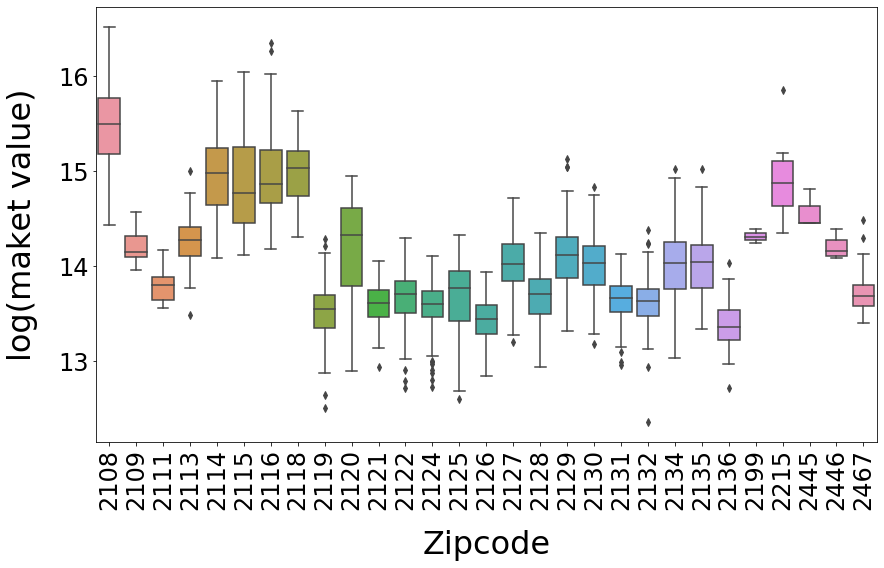

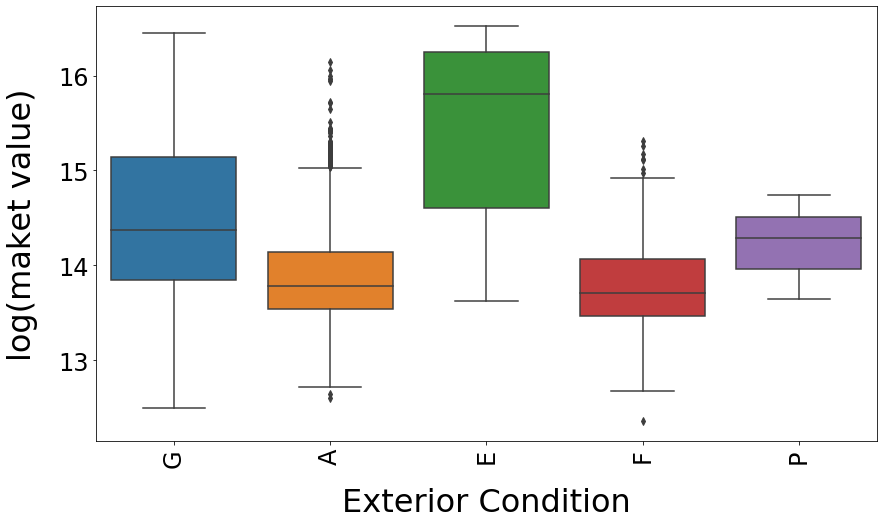

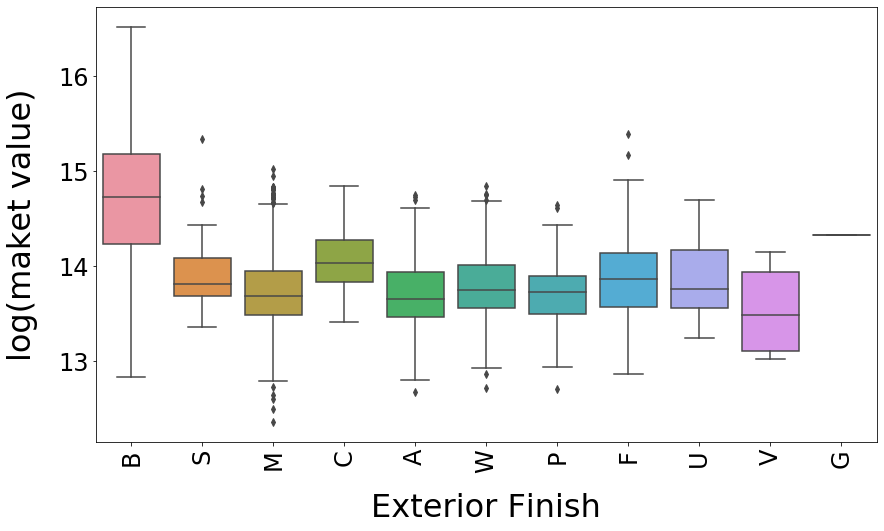

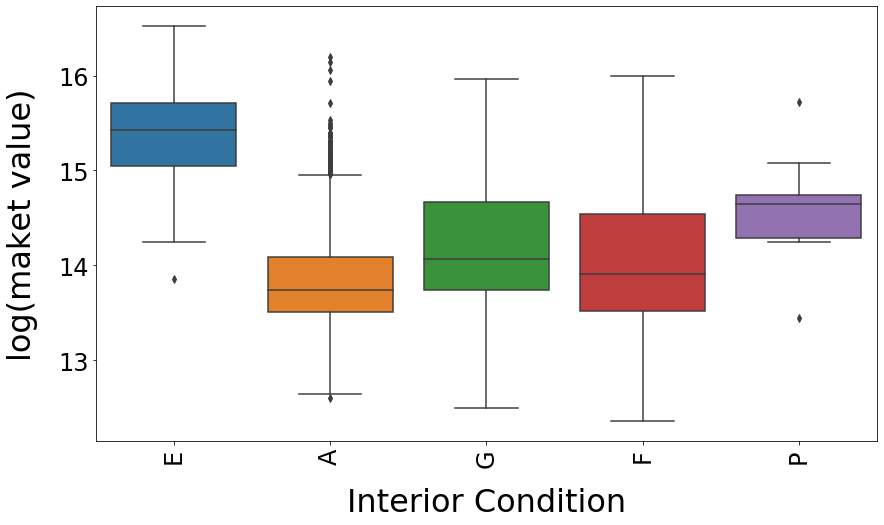

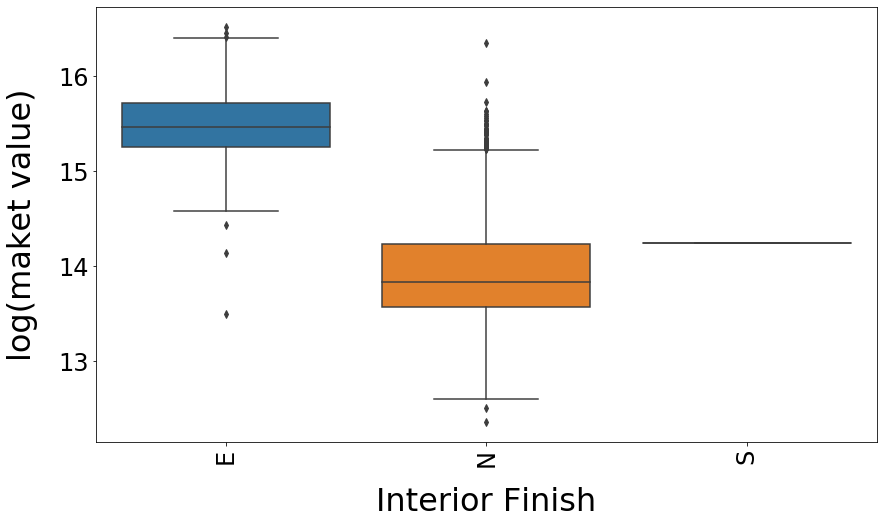

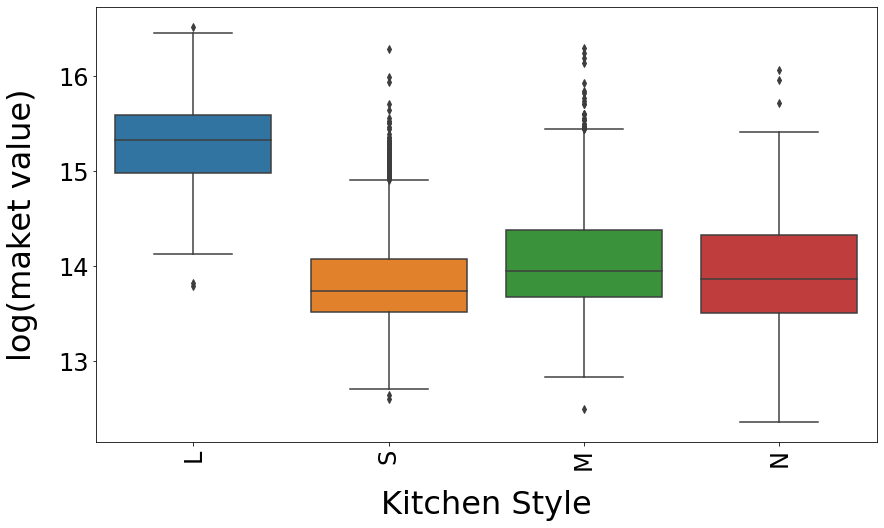

In [9]:
BarPlot("ZIPCODE","MARKET_VALUE","Zipcode","log(maket value)",df,"Bar_Zipcode.png");
BarPlot("R_EXT_CND","MARKET_VALUE","Exterior Condition","log(maket value)",df,"Bar_Ext_Cond.png");
BarPlot("R_EXT_FIN","MARKET_VALUE","Exterior Finish","log(maket value)",df,"Bar_Ext_Fin.png");
BarPlot("R_INT_CND","MARKET_VALUE","Interior Condition","log(maket value)",df,"Bar_Int_Cond.png");
BarPlot("R_INT_FIN","MARKET_VALUE","Interior Finish","log(maket value)",df,"Bar_Int_Fin.png");
BarPlot("R_KITCH_STYLE","MARKET_VALUE","Kitchen Style","log(maket value)",df,"Bar_Kit_Style.png");

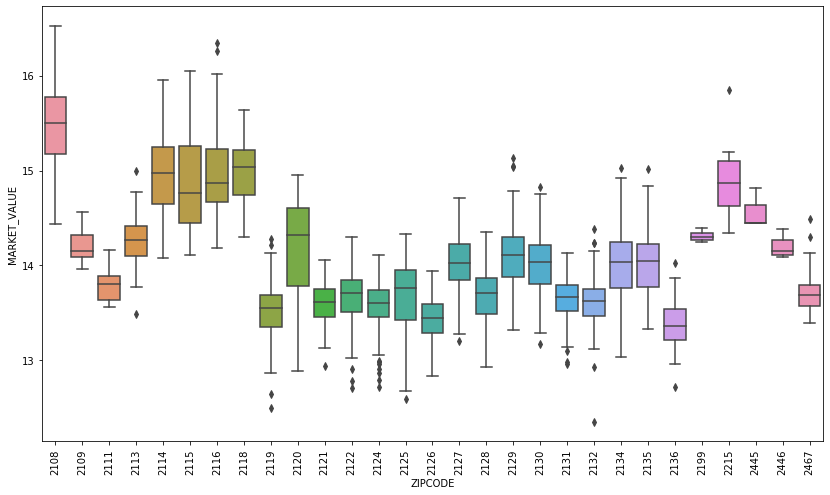

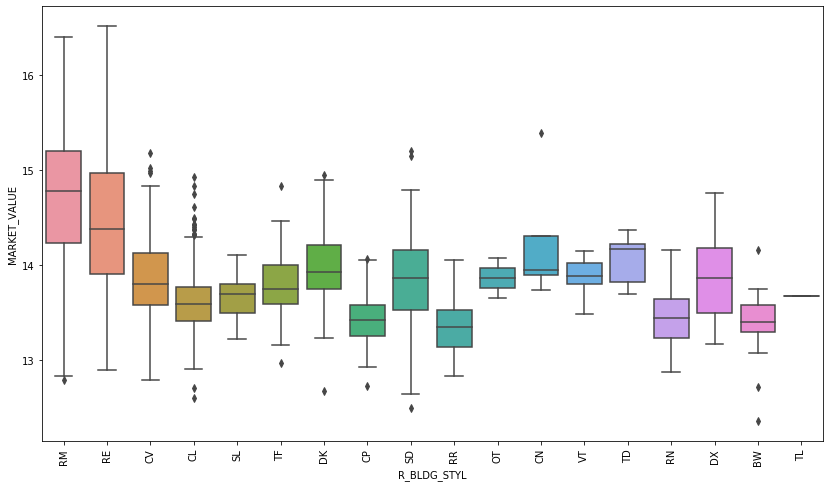

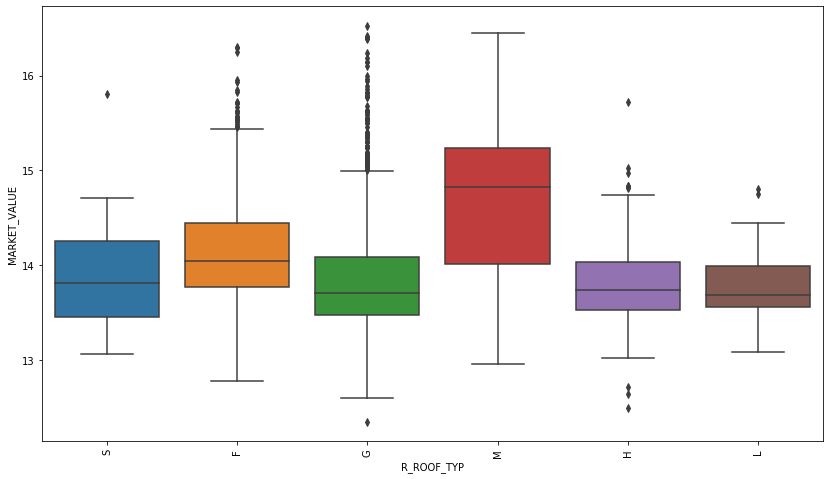

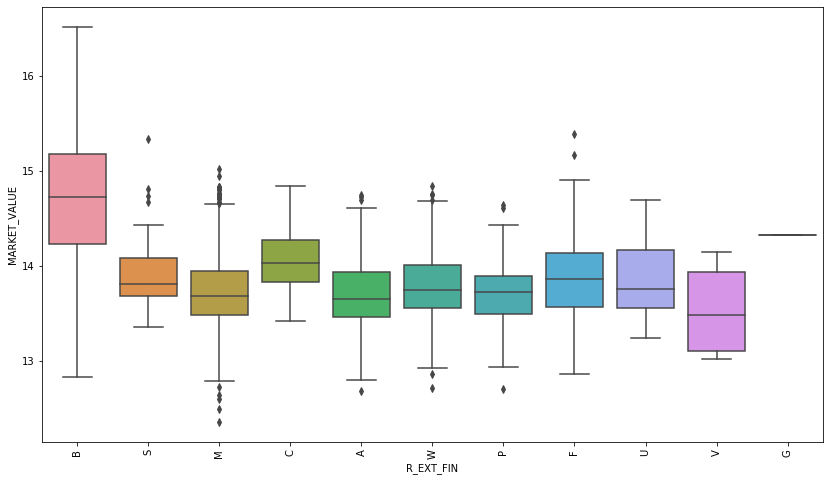

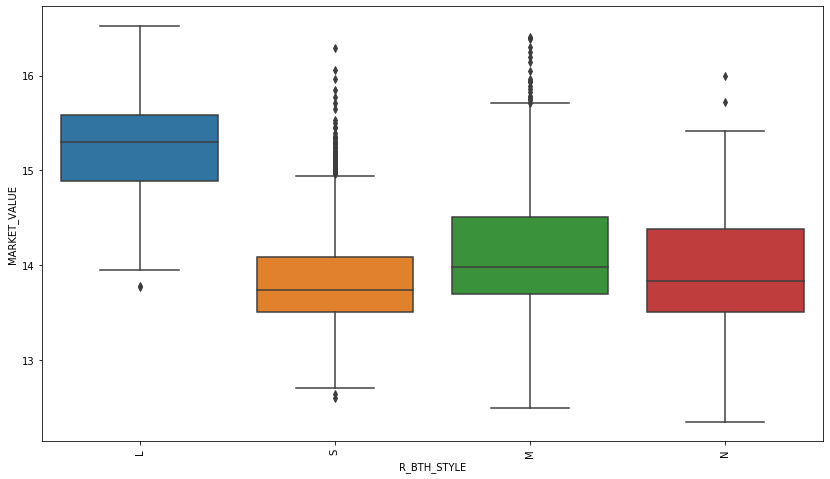

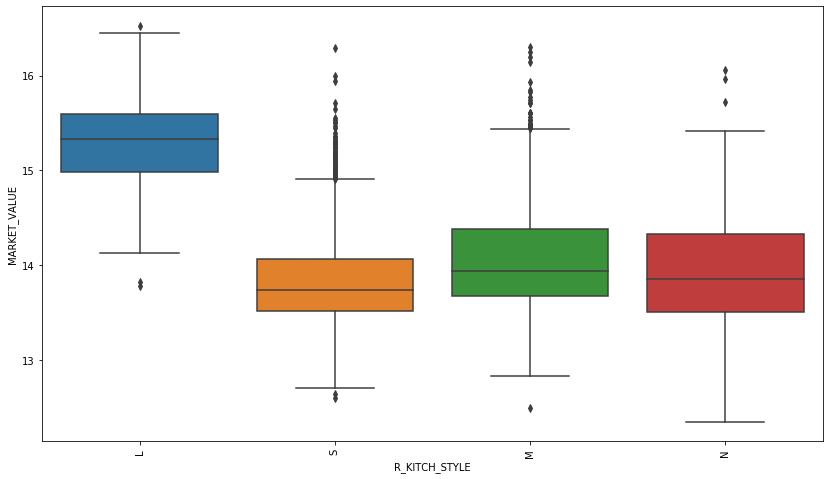

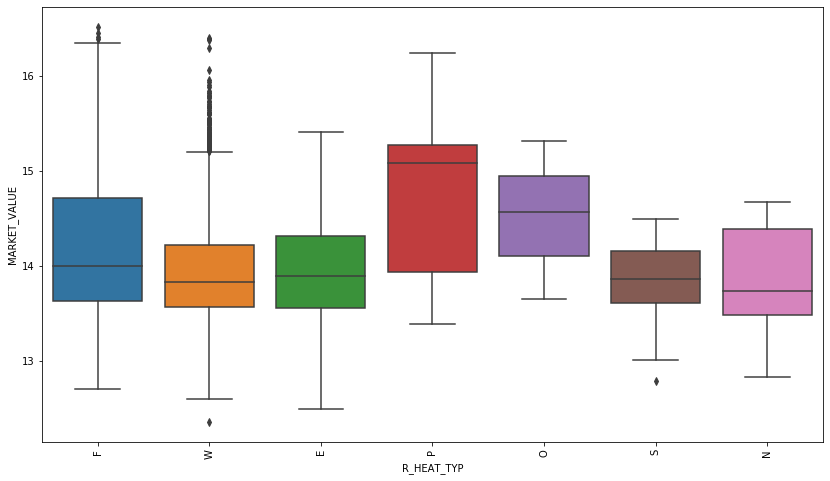

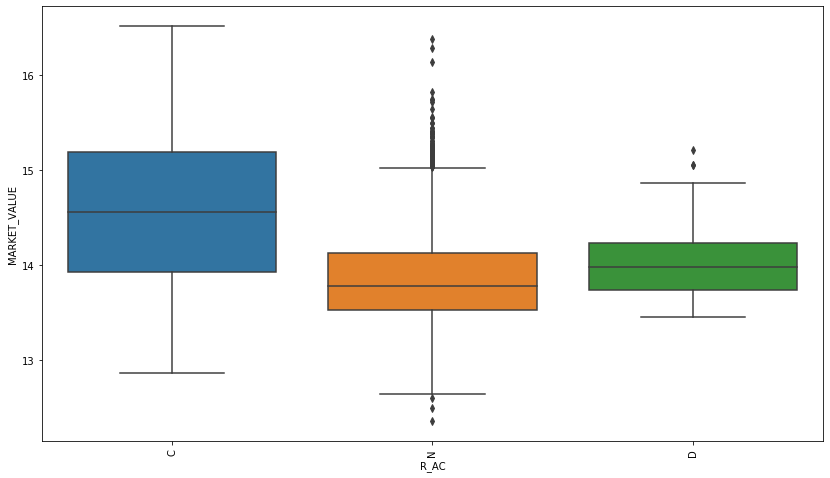

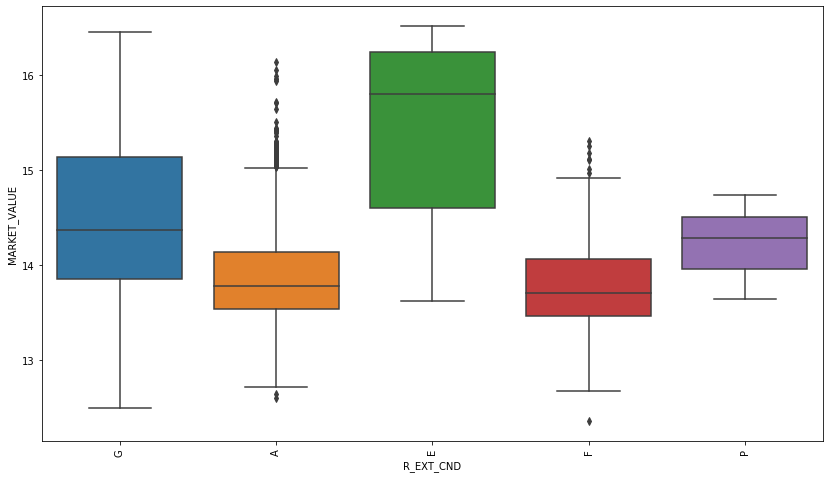

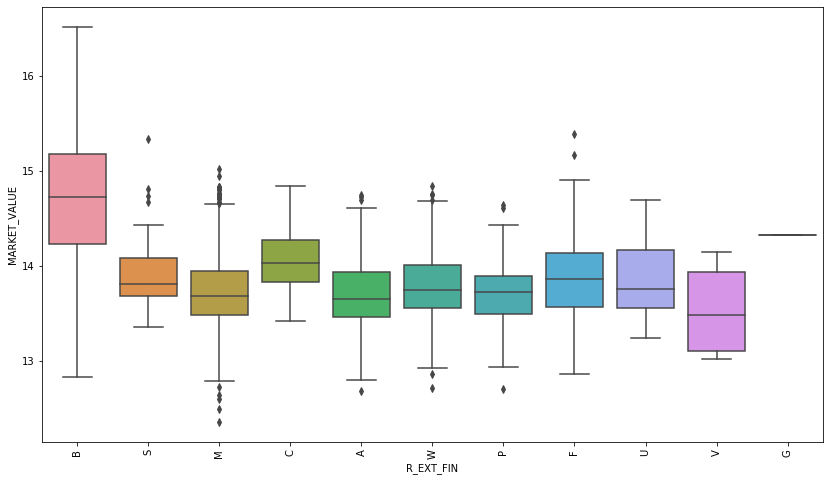

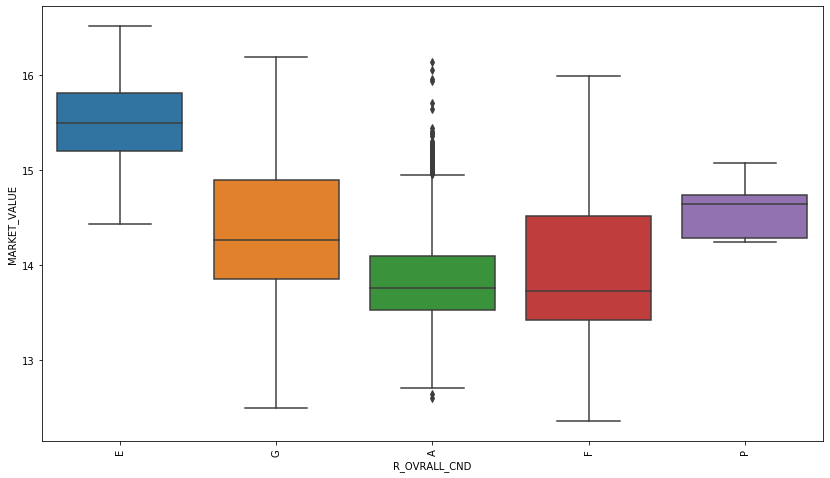

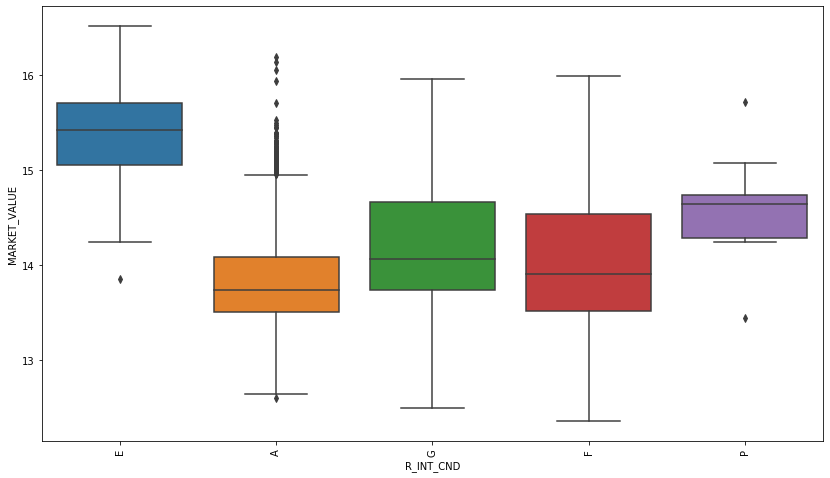

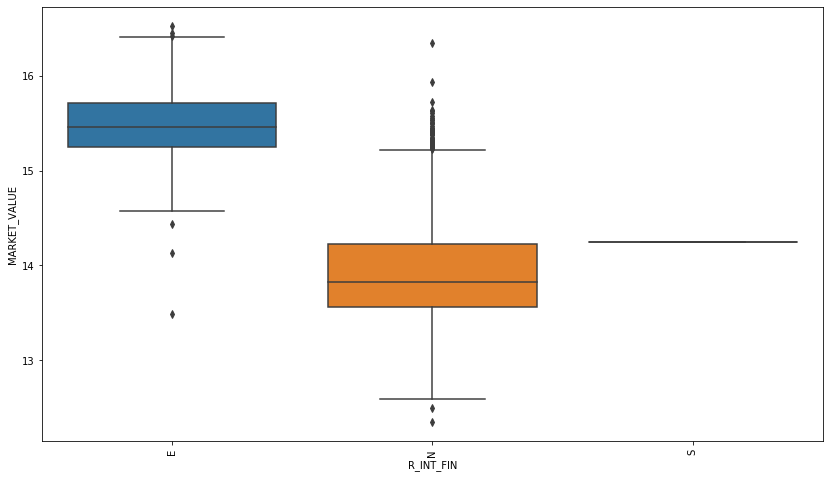

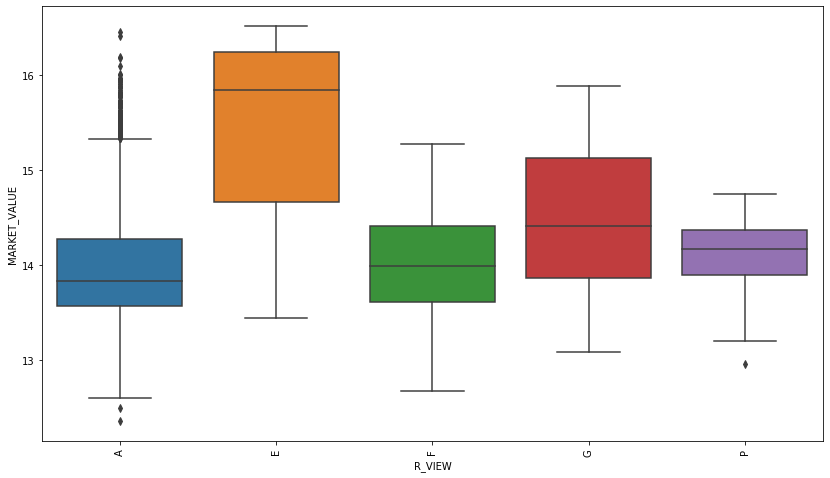

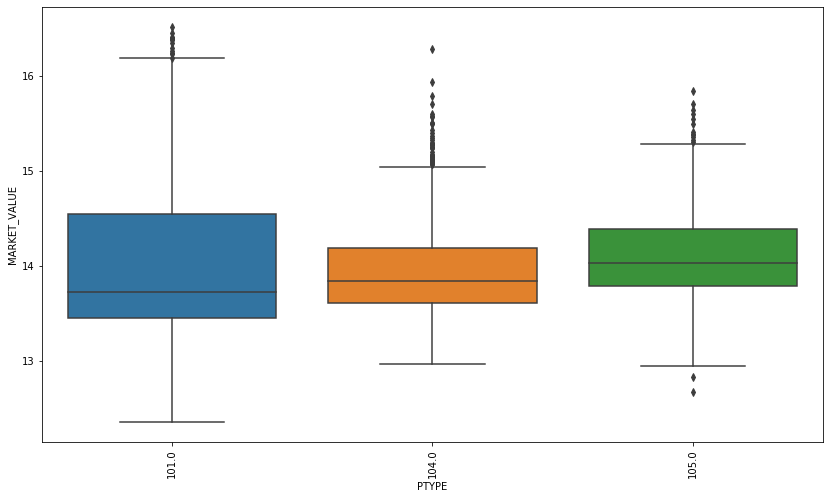

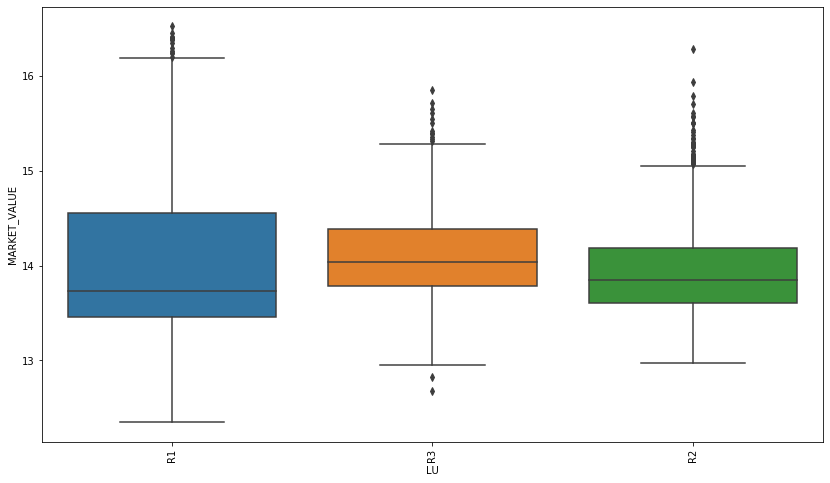

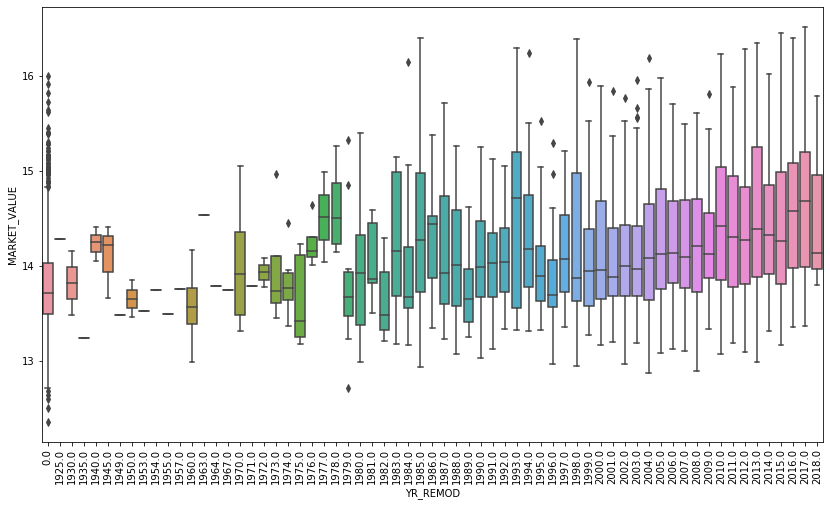

In [10]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="ZIPCODE", y="MARKET_VALUE", data=df[df["key"]==2019])
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="R_BLDG_STYL", y="MARKET_VALUE", data=df[df["key"]==2019])
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="R_ROOF_TYP", y="MARKET_VALUE", data=df[df["key"]==2019])
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="R_EXT_FIN", y="MARKET_VALUE", data=df[df["key"]==2019])
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="R_BTH_STYLE", y="MARKET_VALUE", data=df[df["key"]==2019])
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="R_KITCH_STYLE", y="MARKET_VALUE", data=df[df["key"]==2019])
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="R_HEAT_TYP", y="MARKET_VALUE", data=df[df["key"]==2019])
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="R_AC", y="MARKET_VALUE", data=df[df["key"]==2019])
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="R_EXT_CND", y="MARKET_VALUE", data=df[df["key"]==2019])
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="R_EXT_FIN", y="MARKET_VALUE", data=df[df["key"]==2019])
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="R_OVRALL_CND", y="MARKET_VALUE", data=df[df["key"]==2019])
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="R_INT_CND", y="MARKET_VALUE", data=df[df["key"]==2019])
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="R_INT_FIN", y="MARKET_VALUE", data=df[df["key"]==2019])
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="R_VIEW", y="MARKET_VALUE", data=df[df["key"]==2019])
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="PTYPE", y="MARKET_VALUE", data=df[df["key"]==2019])
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="LU", y="MARKET_VALUE", data=df[df["key"]==2019])
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="YR_REMOD", y="MARKET_VALUE", data=df[df["key"]==2019])
plt.xticks(rotation=90)
plt.show()

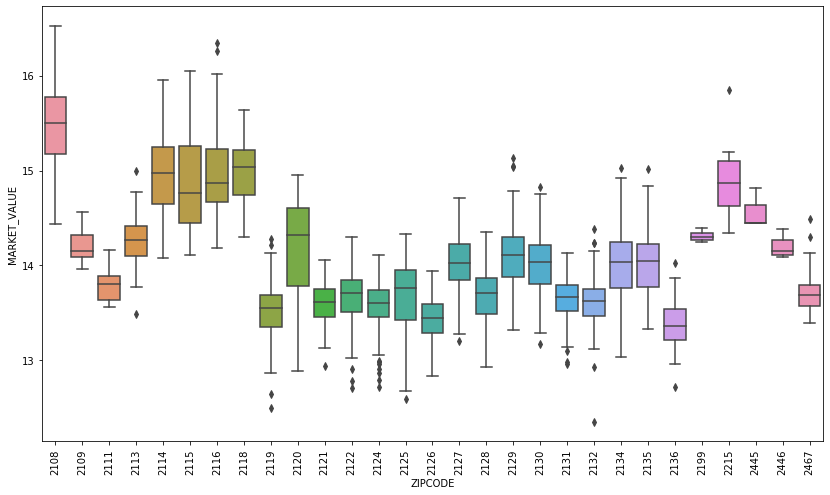

In [11]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="ZIPCODE", y="MARKET_VALUE", data=df[df["key"]==2019])
plt.xticks(rotation=90)
plt.show()


# --- additional feature engineering! ---

## (1) Avg zipcode Market-value per year. 


In [12]:
Zips = pd.unique(df["ZIPCODE"])
Years = pd.unique(df["key"])
len(df)

df["ZIP_MV"] = 0
df2 = pd.DataFrame(columns=df.columns)
for zv in Zips: 
    temper2 = df[df["ZIPCODE"]==zv]; 
    temper2["ZIP_MV"] = temper2["MARKET_VALUE"].mean()
    df2 = df2.append(temper2)

print(len(df2))

/home/npatel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


28408


In [13]:
df2.columns

Index(['key', 'PID', 'ST_NUM', 'ST_NAME', 'ST_NAME_SUF', 'ZIPCODE', 'PTYPE',
       'LU', 'OWN_OCC', 'AV_BLDG', 'AV_TOTAL', 'GROSS_TAX', 'LAND_SF',
       'YR_BUILT', 'YR_REMOD', 'GROSS_AREA', 'LIVING_AREA', 'NUM_FLOORS',
       'R_BLDG_STYL', 'R_ROOF_TYP', 'R_EXT_FIN', 'R_TOTAL_RMS', 'R_BDRMS',
       'R_FULL_BTH', 'R_HALF_BTH', 'R_BTH_STYLE', 'R_KITCH', 'R_KITCH_STYLE',
       'R_HEAT_TYP', 'R_AC', 'R_FPLACE', 'R_EXT_CND', 'R_OVRALL_CND',
       'R_INT_CND', 'R_INT_FIN', 'R_VIEW', 'FULLADD', 'R_TOTAL_BTH',
       'MARKET_VALUE', 'DIS0', 'DIS1', 'DIS2', 'DIS3', 'DIS4', 'DIS5',
       'ZIP_MV'],
      dtype='object')

In [14]:
#df2.to_csv("downsized_7.csv",index=False)

In [15]:
myfeat = ['key', 'PTYPE',
       'LU', 'OWN_OCC', 'LAND_SF', 'YR_BUILT', 'YR_REMOD', 'GROSS_AREA', 'LIVING_AREA', 'NUM_FLOORS',
       'R_BLDG_STYL', 'R_ROOF_TYP', 'R_EXT_FIN', 'R_TOTAL_RMS', 'R_BDRMS',
       'R_FULL_BTH', 'R_HALF_BTH', 'R_BTH_STYLE', 'R_KITCH', 'R_KITCH_STYLE',
       'R_HEAT_TYP', 'R_AC', 'R_FPLACE', 'R_EXT_CND', 'R_OVRALL_CND',
       'R_INT_CND', 'R_INT_FIN', 'R_VIEW', 'R_TOTAL_BTH','MARKET_VALUE', "ZIP_MV",
        'DIS0', 'DIS1', 'DIS2', 'DIS3', 'DIS4', 'DIS5']
data = df2[myfeat]

In [16]:
data["key"] = pd.to_numeric(data["key"], errors='ignore')

/home/npatel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
data = pd.get_dummies(data)

In [18]:
all_features = data.columns
index = np.argwhere(all_features=="MARKET_VALUE")
all_features = np.delete(all_features, index)
target_feature = "MARKET_VALUE"

In [19]:
data.columns

Index(['key', 'PTYPE', 'LAND_SF', 'YR_BUILT', 'YR_REMOD', 'GROSS_AREA',
       'LIVING_AREA', 'NUM_FLOORS', 'R_TOTAL_RMS', 'R_BDRMS',
       ...
       'R_INT_CND_G', 'R_INT_CND_P', 'R_INT_FIN_E', 'R_INT_FIN_N',
       'R_INT_FIN_S', 'R_VIEW_A', 'R_VIEW_E', 'R_VIEW_F', 'R_VIEW_G',
       'R_VIEW_P'],
      dtype='object', length=106)

In [20]:
for feat in data.columns: 
    temper = data[data[feat].isna()]
    if(len(temper)>0): 
        print(feat, len(temper))

In [21]:
#data[all_features].hist(figsize=(16,20))
#plt.show()

# Data Setup for Modeling

In [22]:
test19 = data[data["key"]==2019]
train19 = data[data["key"]!=2019]

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(train19[all_features], train19[target_feature], test_size=0.2, random_state=1)

In [24]:
#X_test = X_test.append(test19[all_features]);
#Y_test = Y_test.append(test19[target_feature]); 

In [25]:
X_train.columns

Index(['key', 'PTYPE', 'LAND_SF', 'YR_BUILT', 'YR_REMOD', 'GROSS_AREA',
       'LIVING_AREA', 'NUM_FLOORS', 'R_TOTAL_RMS', 'R_BDRMS',
       ...
       'R_INT_CND_G', 'R_INT_CND_P', 'R_INT_FIN_E', 'R_INT_FIN_N',
       'R_INT_FIN_S', 'R_VIEW_A', 'R_VIEW_E', 'R_VIEW_F', 'R_VIEW_G',
       'R_VIEW_P'],
      dtype='object', length=105)

In [26]:
X_train

,key,PTYPE,LAND_SF,YR_BUILT,YR_REMOD,GROSS_AREA,LIVING_AREA,NUM_FLOORS,R_TOTAL_RMS,R_BDRMS,...,R_INT_CND_G,R_INT_CND_P,R_INT_FIN_E,R_INT_FIN_N,R_INT_FIN_S,R_VIEW_A,R_VIEW_E,R_VIEW_F,R_VIEW_G,R_VIEW_P
27591,2013,101.0,7143.0,1938.0,0.0,8.531688,7.817625,2.0,10.0,4.0,...,1,0,0,1,0,1,0,0,0,0
2947,2016,101.0,1558.0,2006.0,0.0,8.114923,7.730175,3.0,8.0,4.0,...,0,0,0,1,0,1,0,0,0,0
4907,2013,101.0,620.0,1827.0,1985.0,7.718685,7.538495,3.5,10.0,4.0,...,1,0,0,1,0,1,0,0,0,0
27488,2012,101.0,6881.0,1938.0,0.0,7.885329,7.502738,2.0,6.0,3.0,...,0,0,0,1,0,1,0,0,0,0
27314,2010,101.0,6890.0,1955.0,0.0,7.874359,7.123673,1.0,6.0,2.0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12682,2017,101.0,4888.0,1875.0,2006.0,8.015658,7.391415,2.0,8.0,3.0,...,1,0,0,1,0,1,0,0,0,0
20570,2012,105.0,6010.0,1905.0,0.0,8.869679,8.516193,3.0,18.0,6.0,...,0,0,0,1,0,1,0,0,0,0
6014,2018,104.0,1632.0,1860.0,0.0,8.431199,8.198364,3.0,13.0,4.0,...,0,0,0,1,0,1,0,0,0,0
14169,2018,101.0,3600.0,1900.0,2015.0,8.291547,7.736307,2.0,9.0,4.0,...,1,0,0,1,0,1,0,0,0,0


In [27]:
'''corr = train19.corr()
print(corr.shape)
corr = corr.sort_values(by="MARKET_VALUE",axis=0,ascending=False).sort_values(by="MARKET_VALUE",axis=1,ascending=False)

plt.figure(figsize=(16, 16), dpi= 300)
plt.rcParams['figure.figsize'] = [20, 10]
cmap = cmap.get_cmap('jet', 38)
#plt.imshow(df.corr(), interpolation="nearest", cmap=cmap)
plt.matshow(corr.values, interpolation="nearest", cmap=cmap)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns,rotation=90);
plt.yticks(range(len(corr.columns)), corr.columns);
#plt.show()
'''

'corr = train19.corr()\nprint(corr.shape)\ncorr = corr.sort_values(by="MARKET_VALUE",axis=0,ascending=False).sort_values(by="MARKET_VALUE",axis=1,ascending=False)\n\nplt.figure(figsize=(16, 16), dpi= 300)\nplt.rcParams[\'figure.figsize\'] = [20, 10]\ncmap = cmap.get_cmap(\'jet\', 38)\n#plt.imshow(df.corr(), interpolation="nearest", cmap=cmap)\nplt.matshow(corr.values, interpolation="nearest", cmap=cmap)\nplt.colorbar()\nplt.xticks(range(len(corr.columns)), corr.columns,rotation=90);\nplt.yticks(range(len(corr.columns)), corr.columns);\n#plt.show()\n'

# Bayesian Linear Regression - Monte Carlo

In [30]:
# PyMC3 for Bayesian Inference
import pymc3 as pm


In [36]:
# Formula for Bayesian Linear Regression (follows R formula syntax
formula = target_feature + ' ~ ' + ' + '.join(['%s' % variable for variable in all_features])
print(formula)

MCX_train = X_train.copy(deep=True)
MCX_train["MARKET_VALUE"] = Y_train;

MARKET_VALUE ~ key + PTYPE + LAND_SF + YR_BUILT + YR_REMOD + GROSS_AREA + LIVING_AREA + NUM_FLOORS + R_TOTAL_RMS + R_BDRMS + R_FULL_BTH + R_HALF_BTH + R_KITCH + R_FPLACE + R_TOTAL_BTH + ZIP_MV + DIS0 + DIS1 + DIS2 + DIS3 + DIS4 + DIS5 + LU_R1 + LU_R2 + LU_R3 + OWN_OCC_0 + OWN_OCC_1 + R_BLDG_STYL_BW + R_BLDG_STYL_CL + R_BLDG_STYL_CN + R_BLDG_STYL_CP + R_BLDG_STYL_CV + R_BLDG_STYL_DK + R_BLDG_STYL_DX + R_BLDG_STYL_OT + R_BLDG_STYL_RE + R_BLDG_STYL_RM + R_BLDG_STYL_RN + R_BLDG_STYL_RR + R_BLDG_STYL_SD + R_BLDG_STYL_SL + R_BLDG_STYL_TD + R_BLDG_STYL_TF + R_BLDG_STYL_TL + R_BLDG_STYL_VT + R_ROOF_TYP_F + R_ROOF_TYP_G + R_ROOF_TYP_H + R_ROOF_TYP_L + R_ROOF_TYP_M + R_ROOF_TYP_S + R_EXT_FIN_A + R_EXT_FIN_B + R_EXT_FIN_C + R_EXT_FIN_F + R_EXT_FIN_G + R_EXT_FIN_M + R_EXT_FIN_O + R_EXT_FIN_P + R_EXT_FIN_S + R_EXT_FIN_U + R_EXT_FIN_V + R_EXT_FIN_W + R_BTH_STYLE_L + R_BTH_STYLE_M + R_BTH_STYLE_N + R_BTH_STYLE_S + R_KITCH_STYLE_L + R_KITCH_STYLE_M + R_KITCH_STYLE_N + R_KITCH_STYLE_S + R_HEAT_TYP_E + 

In [76]:
# Context for the model
#with pm.Model() as normal_model:
    
    # The prior for the model parameters will be a normal distribution
#    family = pm.glm.families.Normal()
    
    # Creating the model requires a formula and data (and optionally a family)
#    pm.GLM.from_formula(formula, data = MCX_train, family = family)
    
    # Perform Markov Chain Monte Carlo sampling
#    normal_trace = pm.sample(init="advi+adapt_diag",
#                             draws=2000,tune=500,n_init=90000,
#                             cores=1,random_seed=1) #draws=2000, chains = 2, tune = 500)

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
Average Loss = 44,963: 100%|█████████▉| 89968/90000 [04:02<00:00, 373.44it/s]    Interrupted at 89,999 [99%]: Average Loss = 5.8876e+09
Sequential sampling (2 chains in 1 job)
NUTS: [sd, R_VIEW_P, R_VIEW_G, R_VIEW_F, R_VIEW_E, R_VIEW_A, R_INT_FIN_S, R_INT_FIN_N, R_INT_FIN_E, R_INT_CND_P, R_INT_CND_G, R_INT_CND_F, R_INT_CND_E, R_INT_CND_A, R_OVRALL_CND_P, R_OVRALL_CND_G, R_OVRALL_CND_F, R_OVRALL_CND_E, R_OVRALL_CND_A, R_EXT_CND_P, R_EXT_CND_G, R_EXT_CND_F, R_EXT_CND_E, R_EXT_CND_A, R_AC_Y, R_AC_N, R_AC_D, R_AC_C, R_HEAT_TYP_W, R_HEAT_TYP_S, R_HEAT_TYP_P, R_HEAT_TYP_O, R_HEAT_TYP_N, R_HEAT_TYP_F, R_HEAT_TYP_E, R_KITCH_STYLE_S, R_KITCH_STYLE_N, R_KITCH_STYLE_M, R_KITCH_STYLE_L, R_BTH_STYLE_S, R_BTH_STYLE_N, R_BTH_STYLE_M, R_BTH_STYLE_L, R_EXT_FIN_W, R_EXT_FIN_V, R_EXT_FIN_U, R_EXT_FIN_S, R_EXT_FIN_P, R_EXT_FIN_O, R_EXT_FIN_M, R_EXT_FIN_G, R_EXT_FIN_F, R_EXT_FIN_C, R_EXT_FIN_B, R_EXT_FIN_A, R_ROOF_TYP_S, R_ROOF_TYP_M

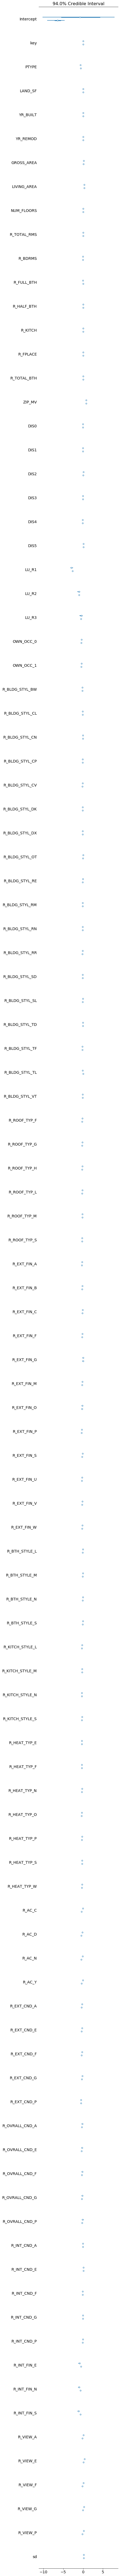

In [77]:
pm.forestplot(normal_trace); 

In [78]:
# Print out the mean variable weight from the trace
for variable in normal_trace.varnames:
    print('Variable: {:15} Mean weight in model: {:.4f}'.format(variable,np.mean(normal_trace[variable])))

Variable: Intercept       Mean weight in model: -3.5434
Variable: key             Mean weight in model: 0.0344
Variable: PTYPE           Mean weight in model: -0.5931
Variable: LAND_SF         Mean weight in model: 0.0000
Variable: YR_BUILT        Mean weight in model: -0.0003
Variable: YR_REMOD        Mean weight in model: 0.0000
Variable: GROSS_AREA      Mean weight in model: 0.1397
Variable: LIVING_AREA     Mean weight in model: 0.3074
Variable: NUM_FLOORS      Mean weight in model: 0.0310
Variable: R_TOTAL_RMS     Mean weight in model: 0.0025
Variable: R_BDRMS         Mean weight in model: -0.0044
Variable: R_FULL_BTH      Mean weight in model: 0.0019
Variable: R_HALF_BTH      Mean weight in model: 0.0102
Variable: R_KITCH         Mean weight in model: 0.0173
Variable: R_FPLACE        Mean weight in model: 0.0146
Variable: R_TOTAL_BTH     Mean weight in model: 0.0532
Variable: ZIP_MV          Mean weight in model: 0.7672
Variable: DIS0            Mean weight in model: -0.0117
Varia

/home/npatel/miniconda3/lib/python3.7/site-packages/arviz/plots/plot_utils.py:506: SyntaxWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (107) in plot_posterior, generating only 40 plots
  SyntaxWarning,


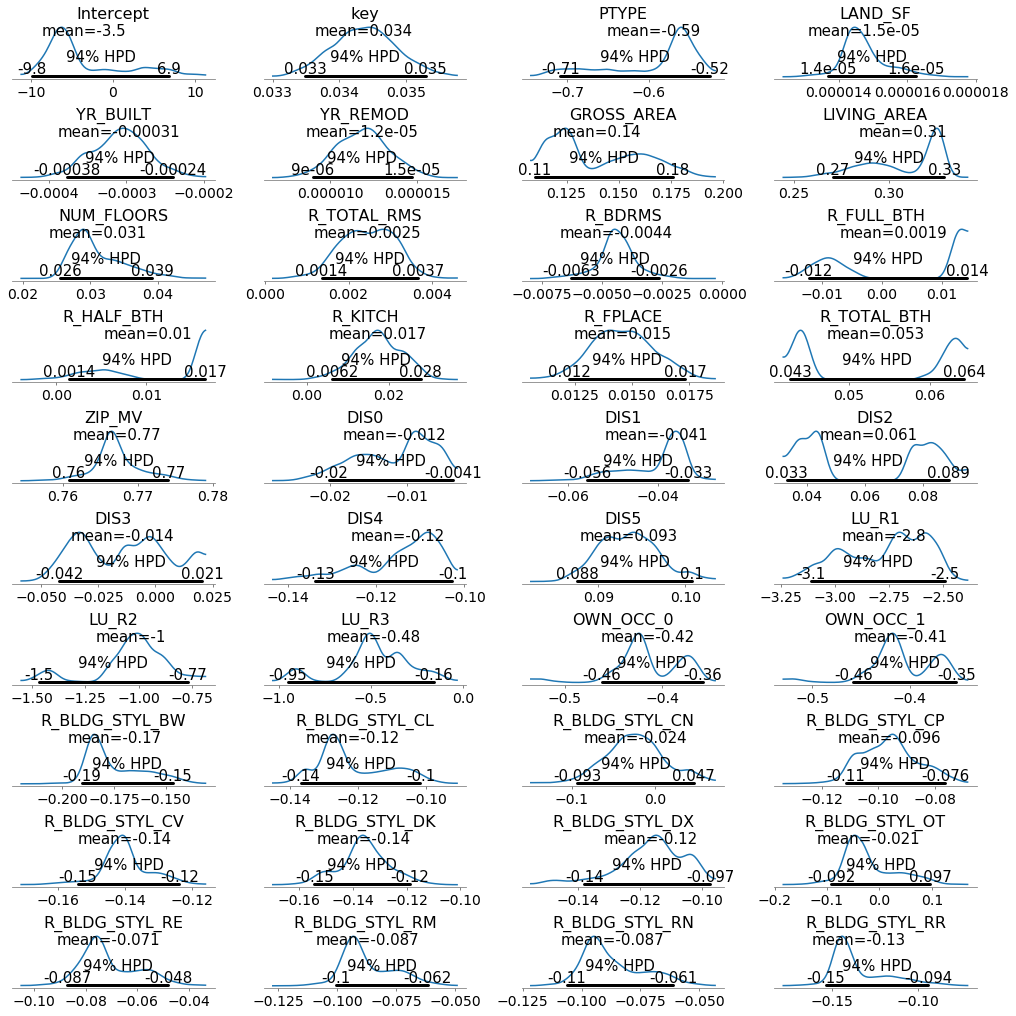

In [79]:
pm.plot_posterior(normal_trace,figsize=(14,14)); 

In [80]:
pm.summary(normal_trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,-3.543440,5.077592e+00,5.019498e-01,-9.931738,7.126459,3.078763,1.447208
key,0.034371,4.769140e-04,4.029891e-05,0.033423,0.035294,27.510993,1.057963
PTYPE,-0.593058,5.655567e-02,5.602781e-03,-0.712178,-0.524346,2.643310,1.511199
LAND_SF,0.000015,6.488623e-07,5.272227e-08,0.000014,0.000016,16.322279,1.149564
YR_BUILT,-0.000309,3.666307e-05,3.136471e-06,-0.000378,-0.000234,34.389053,1.014660
YR_REMOD,0.000012,1.513970e-06,1.051690e-07,0.000009,0.000015,73.590936,1.031193
GROSS_AREA,0.139747,2.166266e-02,2.118265e-03,0.109706,0.177617,1.251116,2.503705
LIVING_AREA,0.307417,2.032689e-02,1.979203e-03,0.268699,0.329441,1.336597,2.346515
NUM_FLOORS,0.031047,4.052477e-03,3.603080e-04,0.025561,0.039830,2.118671,1.550643
R_TOTAL_RMS,0.002454,6.539097e-04,5.299948e-05,0.001293,0.003722,25.738158,1.001245


In [86]:
pickle.dump(normal_trace,open("MC.p",'wb')); 

In [87]:
test = pickle.load(open("MC.p","rb")); 

In [89]:
feature_importance = pm.summary(test)
feature_importance.sort_values(by=["mean"])

/home/npatel/miniconda3/lib/python3.7/site-packages/pymc3/stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,-3.543440,5.077592e+00,5.019498e-01,-9.931738,7.126459,3.078763,1.447208
LU_R1,-2.770496,1.920128e-01,1.897293e-02,-3.120198,-2.482645,1.918783,1.737311
LU_R2,-1.036853,1.739330e-01,1.730949e-02,-1.481826,-0.768669,6.209293,1.021681
R_INT_FIN_S,-0.900167,2.700383e-01,2.691116e-02,-1.386440,-0.545271,1.176422,2.959426
R_INT_FIN_N,-0.818916,2.285662e-01,2.265952e-02,-1.249535,-0.585748,1.268255,2.514484
R_INT_FIN_E,-0.721985,2.271556e-01,2.251701e-02,-1.150920,-0.493180,1.273398,2.499505
PTYPE,-0.593058,5.655567e-02,5.602781e-03,-0.712178,-0.524346,2.643310,1.511199
R_EXT_CND_P,-0.511804,1.819185e-02,1.779435e-03,-0.566325,-0.480243,15.958606,1.017961
LU_R3,-0.483121,2.039516e-01,2.031086e-02,-0.958674,-0.153395,6.115775,1.003096
OWN_OCC_0,-0.415455,3.492468e-02,3.469466e-03,-0.468966,-0.356250,5.798328,1.116029


# Random Forrest

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [29]:
model = RandomForestRegressor(n_jobs=-1); 

In [30]:
model.fit(X_train,Y_train)

/home/npatel/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [31]:
model.score(X_train,Y_train)

0.9977796492717153

In [32]:
model.score(X_test,Y_test)

0.9896732417248666

# Feature importance

In [33]:
coef_val = pd.Series(model.feature_importances_,all_features)
print(coef_val.sort_values(ascending=False))
#for index, feat in enumerate(X_train.columns): 
#    print(index, feat, ElasticNetCVModel2.coef_[index])    

ZIP_MV             7.225786e-01
LIVING_AREA        1.322147e-01
GROSS_AREA         2.884036e-02
key                2.779153e-02
DIS5               8.188356e-03
LAND_SF            7.010291e-03
DIS0               6.719451e-03
DIS4               5.185957e-03
DIS1               4.642485e-03
YR_REMOD           4.262639e-03
YR_BUILT           4.034051e-03
DIS2               3.985131e-03
R_TOTAL_BTH        3.835560e-03
PTYPE              2.822634e-03
R_AC_C             2.751544e-03
R_INT_FIN_E        2.661555e-03
DIS3               2.488888e-03
R_INT_FIN_N        2.301889e-03
R_FPLACE           1.996265e-03
LU_R3              1.604252e-03
R_TOTAL_RMS        1.504957e-03
R_AC_N             1.278143e-03
R_INT_CND_G        1.231598e-03
R_EXT_FIN_B        1.150316e-03
R_BDRMS            1.126158e-03
R_KITCH_STYLE_N    8.012377e-04
R_FULL_BTH         7.957475e-04
R_OVRALL_CND_G     7.378453e-04
NUM_FLOORS         6.951337e-04
R_KITCH_STYLE_M    6.261397e-04
R_BTH_STYLE_M      5.845380e-04
R_INT_CN

In [34]:
import eli5

Using TensorFlow backend.
/home/npatel/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/npatel/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/npatel/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/npatel/miniconda3/lib/python3.7/site-packages/t

In [35]:
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, Y_test)

In [36]:
test = eli5.show_weights(perm)

In [41]:
explanation = eli5.formatters.as_dataframe.explain_weights_df(perm,feature_names=X_test.columns.tolist())

# But this line does not "work", i.e. it produces a NoneType object
#explanation_pred = eli5.formatters.as_dataframe.explain_prediction_df(estimator=model, doc=X_test[0])

In [42]:
explanation

,feature,weight,std
0,ZIP_MV,1.002794e+00,1.613063e-02
1,LIVING_AREA,2.315124e-01,5.729114e-03
2,key,5.692202e-02,4.592244e-04
3,GROSS_AREA,5.445821e-02,1.429763e-03
4,DIS5,1.947545e-02,1.129826e-03
5,DIS0,1.422873e-02,7.783293e-04
6,LAND_SF,1.216210e-02,2.851718e-04
7,DIS4,8.398397e-03,2.395215e-04
8,DIS1,6.156871e-03,4.918538e-04
9,DIS2,5.989468e-03,1.823696e-04


In [ ]:
print("train R^2 = ", model.score(X_train,Y_train))
print("test R^2 = ", model.score(X_test,Y_test))
print("test 2019 R^2 = ", model.score(test19[all_features],test19["MARKET_VALUE"]))
stdev = np.sqrt(sum((model.predict(X_train) - Y_train)**2) / (len(Y_train) - 2))
print(stdev, np.exp(stdev))
#print("mse = ", ElasticNetCVModel2.mse_path_)

In [ ]:
fig = plt.figure(figsize=(7,6))
plt.scatter(X_test["GROSS_AREA"],Y_test,label="test",alpha=0.6)
plt.scatter(X_test["GROSS_AREA"],model.predict(X_test[all_features]),color="red",label="predicted",alpha=0.6)
plt.xticks([7.0,8.0,9.0],size=24)
plt.yticks(size=24)
plt.xlabel("log(Gross Area)",size=24)
plt.ylabel("log(market value)",size=24)
plt.legend(prop={'size': 20},frameon=False)
plt.savefig("Model2_AreaVsMV.png",bbox_inches="tight",dpi=300)

In [ ]:
fig = plt.figure(figsize=(7,6))
plt.scatter(Y_test,model.predict(X_test[all_features]),color="blue")
plt.plot([12,17],[12,17],"-",color="red")
plt.xticks([12,13,14,15,16,17],size=24)
plt.yticks([12,13,14,15,16,17],size=24)
plt.ylabel("log(predicted market value)",size=24)
plt.xlabel("log(market value)",size=24)
#plt.legend(prop={'size': 20},frameon=False)
plt.savefig("test_predictMV.png",bbox_inches="tight",dpi=300)

In [ ]:
fig = plt.figure(figsize=(7,6))
plt.scatter(np.exp(Y_test),np.exp(model.predict(X_test[all_features])),color="blue")
plt.plot([0,1.9e7],[0,1.9e7],"-",color="red")
plt.xticks([0.01e7,0.50e7,1.00e7,1.5e7],["0.01","0.5","1.0","1.5"],size=24)
plt.yticks([0.01e7,0.50e7,1.00e7,1.5e7],["0.01","0.5","1.0","1.5"],size=24)
#plt.plot([12,17],[12,17],"-",color="red")
plt.ylabel("predicted market value $(10^7)$",size=24)
plt.xlabel("market value $(10^7)$",size=24)
#plt.legend(prop={'size': 20},frameon=False)
plt.savefig("test_predictMV_NOLOG.png",bbox_inches="tight",dpi=300)

In [ ]:
fig = plt.figure(figsize=(7,6))
plt.scatter(np.exp(X_test["GROSS_AREA"].values),np.exp(Y_test.values),label="test")
plt.scatter(np.exp(X_test["GROSS_AREA"].values),np.exp(model.predict(X_test[all_features])),color="red",label="predicted")
plt.xticks([0.01e4,0.50e4,1.00e4,1.5e4],["0.01","0.5","1.0","1.5"],size=24)
plt.yticks([0.01e7,0.50e7,1.00e7,1.5e7],["0.01","0.5","1.0","1.5"],size=24)

plt.xlabel("Gross Area $(10^4)$",size=24)
plt.ylabel("market value $(10^7)$",size=24)
plt.legend(prop={'size': 20},frameon=False)
plt.savefig("Model2_AreaVsMV_UnLog.png",bbox_inches="tight",dpi=300)

In [ ]:
ndata = data.copy(deep=True); 
ndata.columns

ndata["Residual"] = np.exp(ndata["MARKET_VALUE"]) - np.exp(model.predict(ndata[all_features]))

RSS = (ndata["Residual"]**2).sum()/len(ndata)

print("RSS =", np.sqrt(RSS), "Div = ")

print("mean of residual = ", ndata["Residual"].mean())
print("median of residual = ", ndata["Residual"].median())
print("standard deviation = ", ndata["Residual"].values.std())

In [ ]:
from scipy.stats import norm
xmin=-500000
xmax=500000
sigma_scale=0.2
mean=ndata["Residual"].median()
std = ndata["Residual"].std()

fig = plt.figure(figsize=(7,6))
plt.hist(ndata["Residual"],bins=400, normed=True); 
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std*sigma_scale)
plt.plot(x, y,color="red",lw=2)

string = "mean = 14.5k \n standard deviation = 110k"; 
plt.title(string,size=20)
plt.xticks([-400000,-200000,-100000,0,100000,200000,400000],size=16)
plt.yticks(size=16)
plt.xlabel("Residual",size=20)
#plt.ylabel("zestimate - log(market value)",size=16)

plt.xlim(left=-0.2e6,right=0.2e6)
plt.xticks(rotation=75)
plt.savefig("Model2_Residual.png",bbox_inches="tight",dpi=300)
plt.show()

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
from sklearn import metrics
print("mean absolute error = ", metrics.mean_absolute_error(np.exp(Y_pred),np.exp(Y_test)))
print("mean squared error = ", metrics.mean_squared_error(np.exp(Y_pred),np.exp(Y_test)))
print("root mean squared error = ", np.sqrt(metrics.mean_squared_error(np.exp(Y_pred),np.exp(Y_test))))
print("mean percent error = ", np.mean(np.abs((np.exp(Y_test) - np.exp(Y_pred)) / np.exp(Y_test))) * 100)